<a href="https://colab.research.google.com/github/tanyagupta1/Machine-Learning/blob/main/DL/pytorch/fashion_train_dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5), (0.5))])
# Download and load the training data
trainset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import time

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms

import helper

In [37]:
class Classifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.h1=nn.Linear(784,256)
    self.h2=nn.Linear(256,128)
    self.h3=nn.Linear(128,64)
    self.h4=nn.Linear(64,10)

  def forward(self,x):
    x=x.view(x.shape[0],-1)
    x=F.relu(self.h1(x))
    x=F.relu(self.h2(x))
    x=F.relu(self.h3(x))
    x=F.log_softmax(self.h4(x),dim=1)
    return x

In [38]:
model = Classifier()
criterion=nn.NLLLoss()
optimizer = optim.Adam(model.parameters(),lr=0.003)

In [20]:
epochs = 10
for e in range(epochs):
  running_loss=0
  for images,labels in trainloader:
    logps = model(images)
    loss = criterion(logps,labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  else:
    print(running_loss)

282.94639137387276
273.8368840441108
264.3253283575177
255.785213958472
251.44341783225536
246.693680357188
234.3947199806571
231.9399501606822
225.31659826636314
220.0833459198475


In [24]:

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

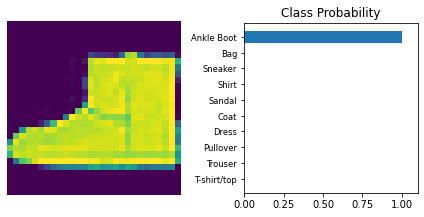

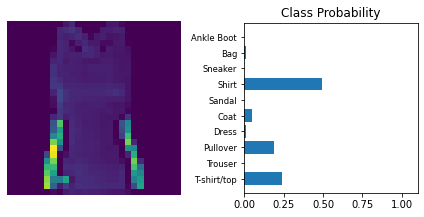

In [31]:
dataiter = iter(testloader)
images,labels = dataiter.next()
for i in range(2):
  img = images[i]
  ps = torch.exp(model(img))
  view_classify(img,ps,version='Fashion')

Validation and accuracy measurement

In [39]:
epochs = 10
train_losses=[]
test_losses=[]
for e in range(epochs):
  running_loss=0
  for images,labels in trainloader:
    logps = model(images)
    loss = criterion(logps,labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  else:
    test_loss = 0
    accuracy = 0
    with torch.no_grad():
      for images,labels in testloader:
        logps = model(images)
        test_loss += criterion(logps,labels)
        ps=torch.exp(logps)
        top_p,top_class=ps.topk(1,dim=1)
        equals=top_class=labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor))
    train_losses.append(running_loss/len(trainloader))
    test_losses.append(test_loss/len(testloader))

    print("Epochs {}/{}".format(e+1,epochs),
          "Training Loss:{:.3f}..".format(train_losses[-1]),
          "Test Loss:{:.3f}..".format(test_losses[-1]),
          "Accuracy :{:.3f}..".format(accuracy/(len(testloader))))


Epochs 1/10 Training Loss:0.514.. Test Loss:0.438.. Accuracy :4.496..
Epochs 2/10 Training Loss:0.389.. Test Loss:0.400.. Accuracy :4.498..
Epochs 3/10 Training Loss:0.357.. Test Loss:0.378.. Accuracy :4.500..
Epochs 4/10 Training Loss:0.332.. Test Loss:0.388.. Accuracy :4.501..
Epochs 5/10 Training Loss:0.316.. Test Loss:0.408.. Accuracy :4.504..
Epochs 6/10 Training Loss:0.305.. Test Loss:0.388.. Accuracy :4.500..
Epochs 7/10 Training Loss:0.295.. Test Loss:0.373.. Accuracy :4.503..
Epochs 8/10 Training Loss:0.286.. Test Loss:0.353.. Accuracy :4.495..
Epochs 9/10 Training Loss:0.276.. Test Loss:0.361.. Accuracy :4.502..
Epochs 10/10 Training Loss:0.267.. Test Loss:0.368.. Accuracy :4.500..


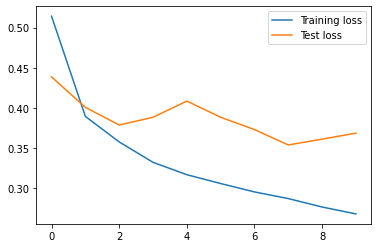

In [41]:
plt.plot(train_losses,label='Training loss')
plt.plot(test_losses,label='Test loss')
plt.legend()

In [42]:
class Classifier_Dropout(nn.Module):
  def __init__(self):
    super().__init__()
    self.h1=nn.Linear(784,256)
    self.h2=nn.Linear(256,128)
    self.h3=nn.Linear(128,64)
    self.h4=nn.Linear(64,10)
    self.dropout = nn.Dropout(p=0.2)

  def forward(self,x):
    x=x.view(x.shape[0],-1)
    x=self.dropout(F.relu(self.h1(x)))
    x=self.dropout(F.relu(self.h2(x)))
    x=self.dropout(F.relu(self.h3(x)))
    x=F.log_softmax(self.h4(x),dim=1)
    return x

Use model.eval() to make p f dropout 0, for example during validation
<br> Use model.train() to turn it back on

In [43]:
model = Classifier_Dropout()
criterion=nn.NLLLoss()
optimizer = optim.Adam(model.parameters(),lr=0.003)
epochs = 10
train_losses=[]
test_losses=[]
for e in range(epochs):
  running_loss=0
  for images,labels in trainloader:
    logps = model(images)
    loss = criterion(logps,labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  else:
    test_loss = 0
    accuracy = 0
    with torch.no_grad():
      model.eval()
      for images,labels in testloader:
        logps = model(images)
        test_loss += criterion(logps,labels)
        ps=torch.exp(logps)
        top_p,top_class=ps.topk(1,dim=1)
        equals=top_class=labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor))
    train_losses.append(running_loss/len(trainloader))
    test_losses.append(test_loss/len(testloader))
    model.train()

    print("Epochs {}/{}".format(e+1,epochs),
          "Training Loss:{:.3f}..".format(train_losses[-1]),
          "Test Loss:{:.3f}..".format(test_losses[-1]),
          "Accuracy :{:.3f}..".format(accuracy/(len(testloader))))

Epochs 1/10 Training Loss:0.611.. Test Loss:0.491.. Accuracy :4.500..
Epochs 2/10 Training Loss:0.482.. Test Loss:0.431.. Accuracy :4.512..
Epochs 3/10 Training Loss:0.450.. Test Loss:0.412.. Accuracy :4.500..
Epochs 4/10 Training Loss:0.432.. Test Loss:0.419.. Accuracy :4.499..
Epochs 5/10 Training Loss:0.424.. Test Loss:0.402.. Accuracy :4.498..
Epochs 6/10 Training Loss:0.414.. Test Loss:0.399.. Accuracy :4.498..
Epochs 7/10 Training Loss:0.407.. Test Loss:0.380.. Accuracy :4.498..
Epochs 8/10 Training Loss:0.397.. Test Loss:0.398.. Accuracy :4.499..
Epochs 9/10 Training Loss:0.395.. Test Loss:0.377.. Accuracy :4.499..
Epochs 10/10 Training Loss:0.391.. Test Loss:0.388.. Accuracy :4.504..


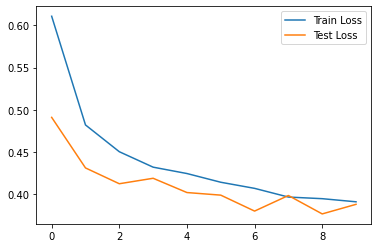

In [44]:
plt.plot(train_losses,label="Train Loss")
plt.plot(test_losses,label="Test Loss")
plt.legend()